In [1]:
# Importamos las librerías necesarias para nuestro código
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

In [2]:
# Leemos el archivo "Nogal.csv" con la siguiente función para empezar a trabajar.
df = pd.DataFrame( pd.read_csv("Nogal.csv", engine="python" ) )
df.head()

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,TS,NaN,NaN,NaN,m/s,m/s,m/s,degC,mV,w/m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-09,00:10,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-09,00:20,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-09,00:30,1.0,NaN,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-09,00:40,1.0,NaN,1.135,0.7410001,-0.093,9.8,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Se toman las columnas relevantes para el análisis
#df0 = df.filter( items=["DATE ","TIME","u_Avg","v_Avg","w_Avg","t_Avg","kh20_Avg ","net_rad_Avg","shf1_Avg ","shf2_Avg ","vv_Avg","airT_Avg","rh_Avg","e_sat_Avg","e_Avg","h2o_hmp_Avg"], axis=1)

#Se eliminan las columnas innecesarias para el análisis (Unnamed)
df.drop( df.columns[18:36], axis=1, inplace=True )
df.drop( df.columns[2:4], axis=1, inplace=True )
df.head()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,TS,NaN,m/s,m/s,m/s,degC,mV,w/m2,w/m2,w/m2,m/s,degC,NaN,kPa,kPa,g/m3
1,01-01-09,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12
2,01-01-09,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02
3,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
4,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737


In [4]:
#Se crea una nueva columna "FECHA" a partir de las columnas "DATE" y "TIME"
df["FECHA"] = df["DATE"] + " "+ df["TIME"]
#Se eliminan las columnas "DATE" y "TIME"
df.drop( ["DATE","TIME"], axis=1, inplace=True )
df.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,m/s,m/s,m/s,degC,mV,w/m2,w/m2,w/m2,m/s,degC,NaN,kPa,kPa,g/m3,NaN
1,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,01-01-09 00:10
2,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,01-01-09 00:20
3,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,01-01-09 00:30
4,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,01-01-09 00:40


In [5]:
#Se elimina el 1er renglón, que contiene las unidades en las que se miden las variables
df = df.drop(df.index[0]).reset_index(drop=True)
df.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,01-01-09 00:10
1,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,01-01-09 00:20
2,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,01-01-09 00:30
3,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,01-01-09 00:40
4,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,01-01-09 00:50


In [6]:
#Se convierten las variables de object a float64
df[df.columns[0:14]] = df[df.columns[0:14]].apply(pd.to_numeric, errors='coerce')

In [7]:
df.dtypes

u_Avg          float64
v_Avg          float64
w_Avg          float64
t_Avg          float64
kh20_Avg       float64
net_rad_Avg    float64
shf1_Avg       float64
shf2_Avg       float64
vv_Avg         float64
airT_Avg       float64
rh_Avg         float64
e_sat_Avg      float64
e_Avg          float64
h2o_hmp_Avg    float64
FECHA           object
dtype: object

In [8]:
#Se utiliza la funcion corr() para hallar correlaciones entre las variables
df1 = df.corr(method='pearson', min_periods=1)
#Se muestra la matriz de correlación
df1.head(14)

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
u_Avg,1.000000,0.241773,0.028537,0.058863,-0.047981,-0.093187,0.089411,0.003093,-0.138616,-0.363807,0.326205,-0.372100,0.107109,0.173845
v_Avg,0.241773,1.000000,0.016387,0.019921,0.153061,-0.116671,0.029321,-0.053957,-0.075175,-0.341920,0.099303,-0.346782,-0.103330,-0.189840
w_Avg,0.028537,0.016387,1.000000,0.667294,0.121010,0.044286,-0.079466,-0.011563,0.923685,-0.374504,0.760058,-0.222593,0.641772,0.125133
t_Avg,0.058863,0.019921,0.667294,1.000000,-0.002184,0.064174,-0.094414,-0.008491,0.593997,-0.288852,0.433942,-0.183273,0.340214,0.576896
kh20_Avg,-0.047981,0.153061,0.121010,-0.002184,1.000000,-0.157635,-0.005268,-0.058466,0.149991,-0.116329,0.031765,-0.119534,-0.134477,-0.326760
net_rad_Avg,-0.093187,-0.116671,0.044286,0.064174,-0.157635,1.000000,-0.206065,-0.027180,0.156017,0.326684,-0.254705,0.381454,0.076382,0.056376
shf1_Avg,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,0.003093,-0.053957,-0.011563,-0.008491,-0.058466,-0.027180,0.059003,1.000000,-0.017869,0.077130,0.014974,0.081516,0.048861,0.151206
vv_Avg,-0.138616,-0.075175,0.923685,0.593997,0.149991,0.156017,-0.089608,-0.017869,1.000000,-0.264771,0.624201,-0.125826,0.525220,-0.193064
airT_Avg,-0.363807,-0.341920,-0.374504,-0.288852,-0.116329,0.326684,-0.121637,0.077130,-0.264771,1.000000,-0.501728,0.963527,0.050730,0.464621


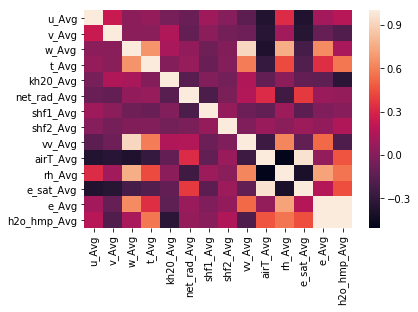

In [9]:
# Heatmap
hm_sns = sns.heatmap( df1 )

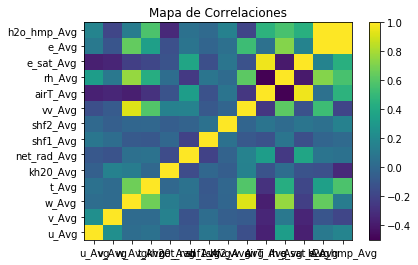

In [10]:
# Heatmap hecho con Matplotlib
plt.pcolor(df1)
plt.yticks(np.arange(0.5, len(df1.index), 1), df1.index)
plt.xticks(np.arange(0.5, len(df1.columns), 1), df1.columns)
plt.colorbar()

plt.title('Mapa de Correlaciones')
plt.show()

[Text(1, 0, '-1'), Text(1, 0, '0'), Text(1, 0, ' 1')]

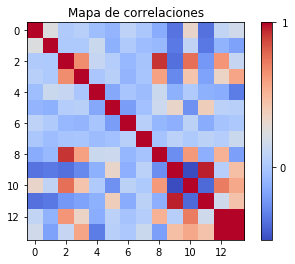

In [11]:
# Heatmap hecho con Matplotlib, con coolwarm
from matplotlib import cm

fig, ax = plt.subplots()

cax = ax.imshow(df1, interpolation='nearest', cmap = cm.coolwarm)
ax.set_title('Mapa de correlaciones')

cbar = fig.colorbar(cax, ticks=[-1, 0, 1])

cbar.ax.set_yticklabels(['-1', '0', ' 1'])

Text(3.2560000000000002, 0.5, 'v_Avg')

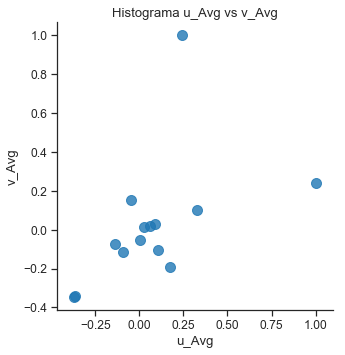

In [12]:
# Scatterplot para las variables donde abs(corr) > 0.6
# df1[ df1[i,j] > 0.5 ]

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('u_Avg',
           'v_Avg', 
           data=df1, 
           fit_reg=False,
#           hue="red", 
           scatter_kws={"marker": "D",
                        "s": 100})

plt.title('Histograma u_Avg vs v_Avg')

plt.xlabel('u_Avg')

plt.ylabel('v_Avg')

In [13]:
df2 = pd.DataFrame()

df2["Variable1"] = df1.columns 
df2["Variable2"] = df1.index

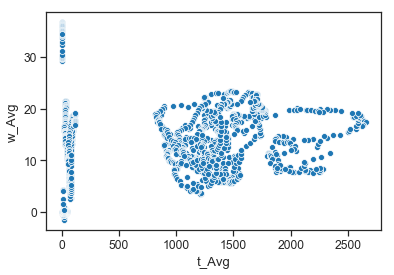

In [14]:
#t_Avg - w_Avg
sns_plot = sns.scatterplot( x=df['t_Avg'], y=df['w_Avg'] )

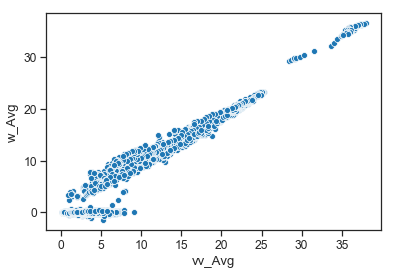

In [18]:
#vv_Avg - w_Avg
sns_plot = sns.scatterplot( x=df['vv_Avg'], y=df['w_Avg'] )

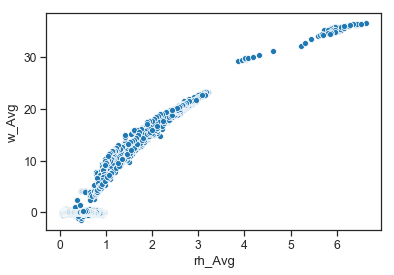

In [21]:
#rh_Avg - w_Avg
sns_plot = sns.scatterplot( x=df['rh_Avg'], y=df['w_Avg'] )

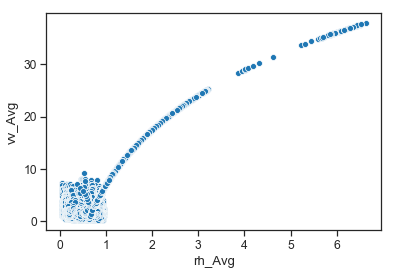

In [22]:
#rh_Avg - vv_Avg
sns_plot = sns.scatterplot( x=df['rh_Avg'], y=df['vv_Avg'] )

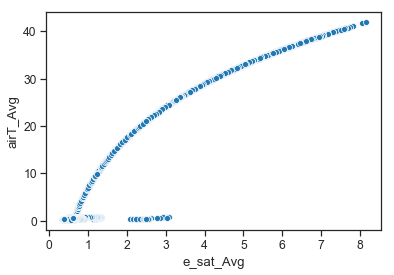

In [23]:
#e_sat_Avg - airT_Avg
sns_plot = sns.scatterplot( x=df['e_sat_Avg'], y=df['airT_Avg'] )

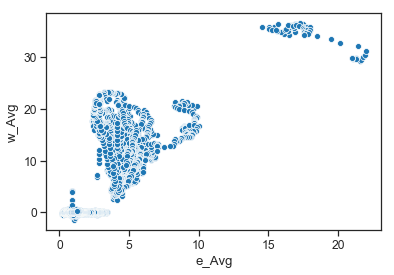

In [17]:
#e_Avg - w_Avg
sns_plot = sns.scatterplot( x=df['e_Avg'], y=df['w_Avg'] )

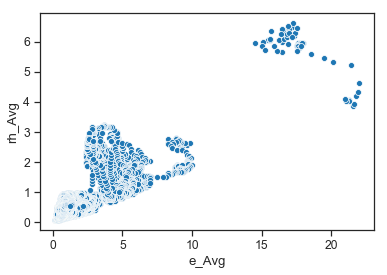

In [16]:
#e_Avg - rh_Avg
sns_plot = sns.scatterplot( x=df['e_Avg'], y=df['rh_Avg'] )

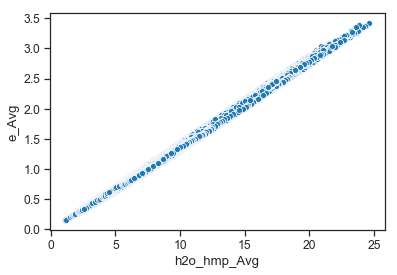

In [19]:
#h2o_hmp_Avg - e_Avg
sns_plot = sns.scatterplot( x=df['h2o_hmp_Avg'], y=df['e_Avg'] )